In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [97]:
titanic_df = pd.read_csv("/home/sabinogs/Downloads/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
"""
Idade media dos passageiros
"""
titanic_df['Age'].mean()

29.69911764705882

In [99]:
titanic_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


## Verificando a relação do porto que embarcou com a sobrevivência
  Também pegamos a média de idade de cada porto

In [100]:
titanic_df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


## Verificando a relação das pessoas que tinham irmãos e sua sobrevivência

In [101]:
titanic_df.groupby(['SibSp','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
SibSp Survived                                                             
0     0                 398     398   398  398  296    398     398   398   
      1                 210     210   210  210  175    210     210   210   
1     0                  97      97    97   97   86     97      97    97   
      1                 112     112   112  112   97    112     112   112   
2     0                  15      15    15   15   14     15      15    15   
      1                  13      13    13   13   11     13      13    13   
3     0                  12      12    12   12    8     12      12    12   
      1                   4       4     4    4    4      4       4     4   
4     0                  15      15    15   15   15     15      15    15   
      1                   3       3     3    3    3      3       3     3   
5     0                   5       5     5    5    5      5       5     5   
8     0                   7       7     7    7    0      7       7     7   

                Cabin  Embarked  
SibSp Survived                   
0     0            49       398  
      1            77       208  
1     0            17        97  
      1            52       112  
2     0             1        15  
      1             5        13  
3     0             1        12  
      1             2         4  
4     0             0        15  
      1             0         3  
5     0             0         5  
8     0             0         7

Parece que quanto mais filhos tinham uma familia, menor a chance de sobrevivência

In [102]:
titanic_df.groupby(['Parch','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Parch Survived                                                             
0     0                 445     445   445  445  335    445     445   445   
      1                 233     233   233  233  186    233     233   233   
1     0                  53      53    53   53   49     53      53    53   
      1                  65      65    65   65   61     65      65    65   
2     0                  40      40    40   40   29     40      40    40   
      1                  40      40    40   40   39     40      40    40   
3     0                   2       2     2    2    2      2       2     2   
      1                   3       3     3    3    3      3       3     3   
4     0                   4       4     4    4    4      4       4     4   
5     0                   4       4     4    4    4      4       4     4   
      1                   1       1     1    1    1      1       1     1   
6     0                   1       1     1    1    1      1       1     1   

                Cabin  Embarked  
Parch Survived                   
0     0            50       445  
      1            91       231  
1     0            11        53  
      1            28        65  
2     0             6        40  
      1            17        40  
3     0             0         2  
      1             0         3  
4     0             1         4  
5     0             0         4  
      1             0         1  
6     0             0         1

a mesma coisa para o número de filhos

## Plot com a relação da idade/Sobreviveu

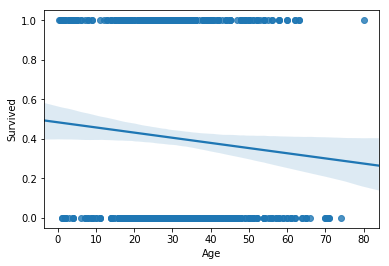

In [103]:
sns.regplot(titanic_df['Age'],titanic_df['Survived'])

A regressão linear nos mostra que a chance de sobrevivência é menor quanto maior a idade

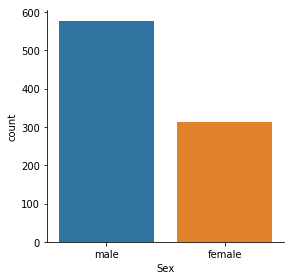

In [104]:
sns.factorplot('Sex',data=titanic_df,kind="count")

haviam quase 2x mais homens que mulheres

### Vamos separar por Classe

utilizar o HUE realiza a separação automaticamente!

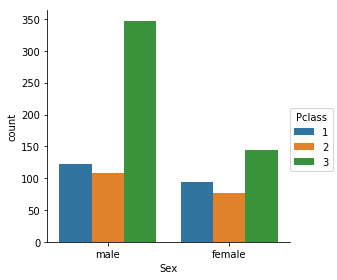

In [105]:
sns.factorplot('Sex',data=titanic_df,kind="count",hue='Pclass')

### O contrario agora
 
 Separar as classes por sexo

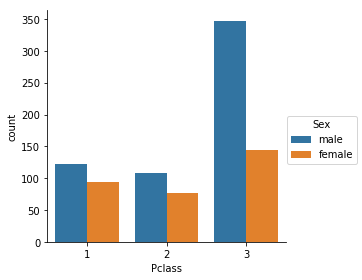

In [106]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='Sex')

## Vamos definir quem são crianças

Utilizando o pd.apply

In [107]:
def define_child(passageiro):
    """
    Recebemos passageiro como parametro pois temos q imaginar o que virá do DataFrame.
    Neste caso, virá uma row com as informações Age e Sex. 
    """
    age,sex = passageiro
    
    if age < 16:
        return 'child'
    else:
        return sex    
    
    
    
    

### Adicionaremos uma row nova para identificar as crianças, mulheres e homens

In [108]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(define_child,axis=1)

In [109]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


### Agora temos crianças, mulheres e homens. 

Podemos plotar e saber a quantidade de crianças também!

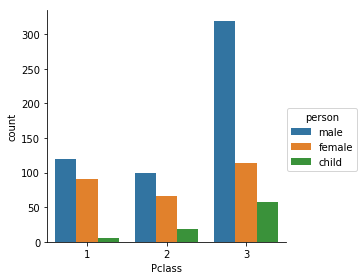

In [110]:
sns.factorplot('Pclass',data=titanic_df,kind="count",hue='person')

## Histograma das idades

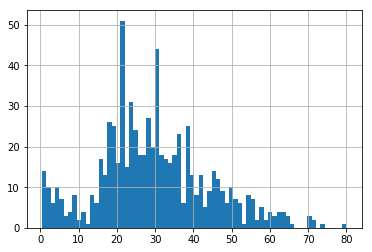

In [111]:
titanic_df['Age'].hist(bins=70)

## Vamos ver o histograma das idades das crianças

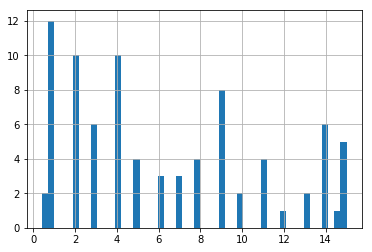

In [112]:
titanic_df[titanic_df['person'] == 'child']['Age'].hist(bins=50)

```data_frame[ data_frame['coluna'] == valor]``` <-- Essa operação realiza um filtro na coluna do DF pelo valor. 

Para plotar o gráfico acima foi feito o seguinte:

filtrado todas as crianças, selecionei a coluna de idade e entao pedi o histograma. 

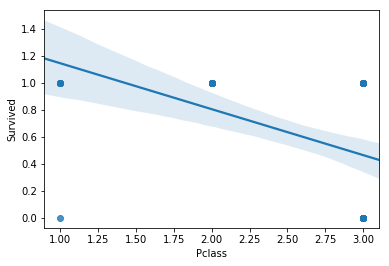

In [113]:
sns.regplot(
    titanic_df[titanic_df['person'] == 'child']['Pclass'],
    titanic_df[titanic_df['person'] == 'child']['Survived']
           )

Aparentemente crianças da classe 3sobreviveram mais

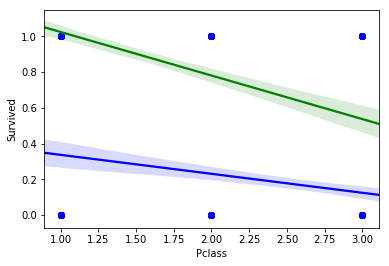

In [114]:
sns.regplot(
    titanic_df[titanic_df['Sex']=='female']['Pclass'],
    titanic_df[titanic_df['Sex']=='female']['Survived'],
    color="green"
)

sns.regplot(
    titanic_df[titanic_df['Sex']=='male']['Pclass'],
    titanic_df[titanic_df['Sex']=='male']['Survived'],
    color = "blue"
    )

Passageiros da classe 3 sobreviveram mais!

### Facet Grid 
***https://seaborn.pydata.org/generated/seaborn.FacetGrid.html***

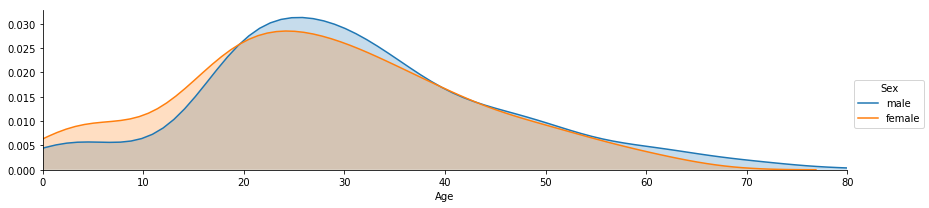

In [115]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)


"""
Setando no gráfico o limite máximo para o eixo X. (0 e a maior idade registrada)
"""
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

### Brincando um pouco com os plots disponíveis no SeaBorn
***https://seaborn.pydata.org/generated/seaborn.distplot.html***

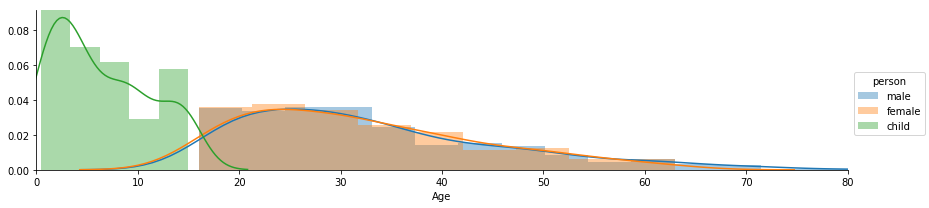

In [116]:
fig2 = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig2.map(sns.distplot,'Age')


oldest = titanic_df['Age'].max()
fig2.set(xlim=(0,oldest))
fig2.add_legend()

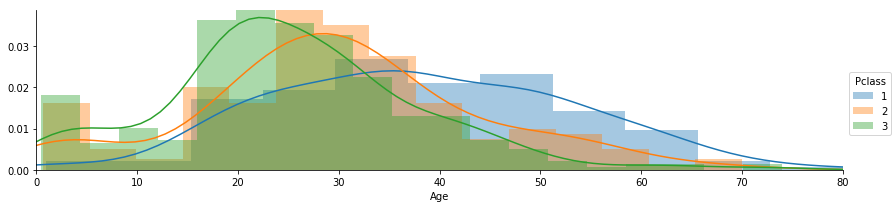

In [117]:
fig2 = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig2.map(sns.distplot,'Age')


oldest = titanic_df['Age'].max()
fig2.set(xlim=(0,oldest))
fig2.add_legend()

## Vamos analisar onde estavam as cabines dos passageiros

In [118]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [181]:
"""
For loop em uma linha
"""
levels = [i[0] for i in deck]
len(levels)

204

## Factor Plot no seaborn
*** https://seaborn.pydata.org/generated/seaborn.factorplot.html *** 

Caso esteja trabalhando para contar ocorrências de strings, você deve indicar o argumento ```kind='count'```. Caso contrário dará erro

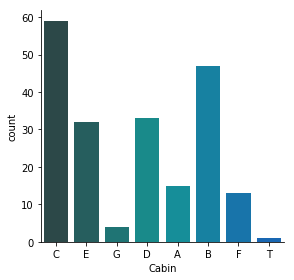

In [120]:
c_df = pd.DataFrame(levels,columns=['Cabin'])

sns.factorplot('Cabin',data=c_df,palette='winter_d',kind="count")

### Verificando quantas pessoas de cada cidade embarcaram e quais classes

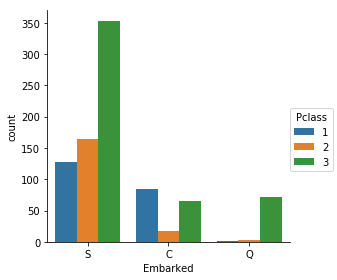

In [121]:
sns.factorplot('Embarked',data=titanic_df,kind='count',hue='Pclass')

### Quantas pessoas estavam com familiares? Quem estava sozinho e quem estava com família

In [122]:
titanic_df['# Familia'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['# Familia']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: # Familia, Length: 891, dtype: int64

### Relação do Número de familiares e se sobreviveram

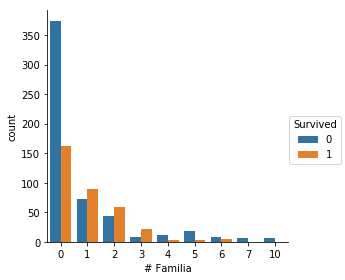

In [123]:
sns.factorplot('# Familia',data=titanic_df,kind='count',hue='Survived')

### Plot da regressão

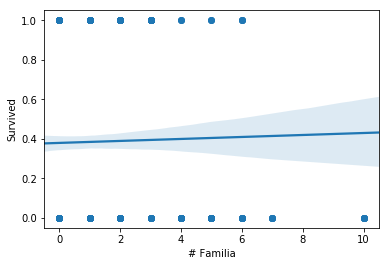

In [125]:
sns.regplot('# Familia',"Survived",titanic_df)

Leve aumento quanto mais gente na família

### Relação entre a Idade e a Sobrevivência

***https://seaborn.pydata.org/generated/seaborn.lmplot.html***

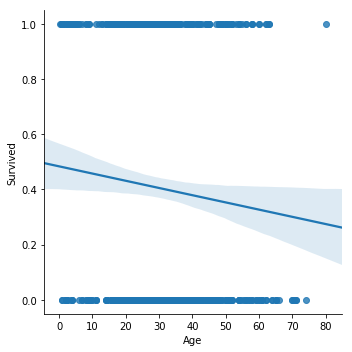

In [130]:
sns.lmplot('Age','Survived',data=titanic_df)

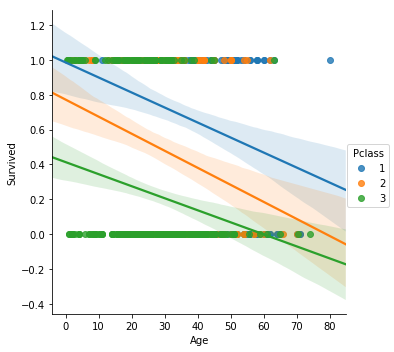

In [137]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

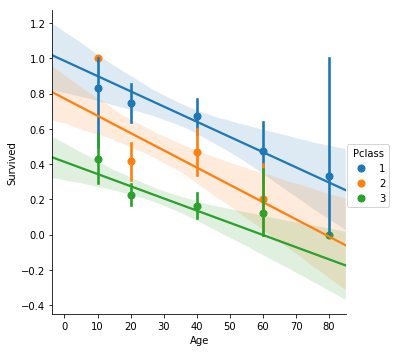

In [142]:
ages = [10,20,40,60,80]
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',x_bins=ages)

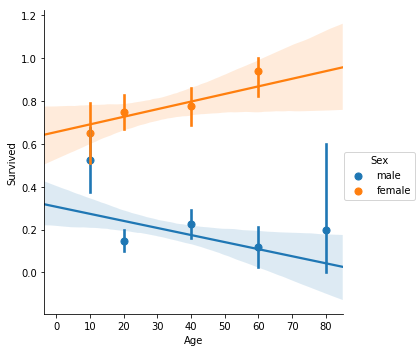

In [144]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Sex',x_bins=ages)

### Vamos tentar relacionar as Cabines com as taxas de sobrevivência

In [162]:
def return_cabin(item):
    return item[0]

In [170]:
titanic_df['deck'] = titanic_df['Cabin'].dropna().map(return_cabin).map({'A':1,'B':2,'C':3})

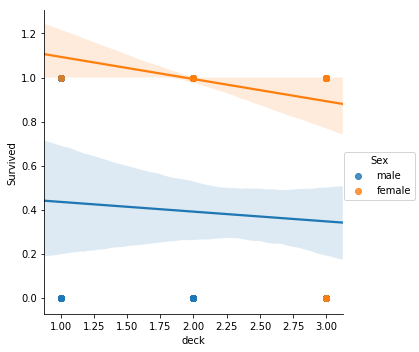

In [187]:
sns.lmplot('deck','Survived',data=titanic_df,hue='Sex')